In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import scipy.stats as si
from sklearn.manifold import TSNE


S = 1433
rf = 0.0265

path = os.getcwd()
yields = pd.read_csv(path + '/yields.csv')
data = pd.read_csv(path + '/data.csv')
callput = data['type'].values
T = (data['days']/365).values
K = data['strike'].values
V = data['IV'].values
P = data['price'].values
len(P)

4981

In [2]:
def option_price(S, K, T, sigma, option = 'C', r = 0.05):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'C':
        return (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'P':
        return (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))

In [110]:
test = np.array([T, K, V])
test = np.nan_to_num(test)
test = test.T

X_embedded = TSNE(n_components=3).fit_transform(test)

(3, 1819)
[[ 12.714722    -2.9511027   12.710897   ...   6.3691573    2.5736432
    0.48801556]
 [ -5.5073376   -2.4365678   -5.5090547  ...   2.4636407    6.613973
   11.177246  ]
 [ 11.153105   -15.125154    11.15426    ...  -1.4036198   -4.5029593
   -9.345027  ]]


c:\users\user-pc\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


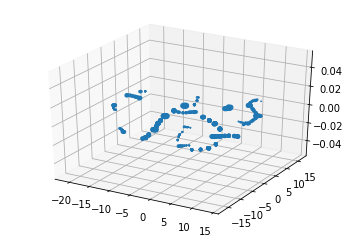

In [104]:
print(X_embedded.shape)
print(X_embedded)
X = np.array(X_embedded).T
fig = plt.figure() 
ax = fig.gca(projection='3d')
plt.scatter(X_embedded[0], X_embedded[1], X_embedded[2])

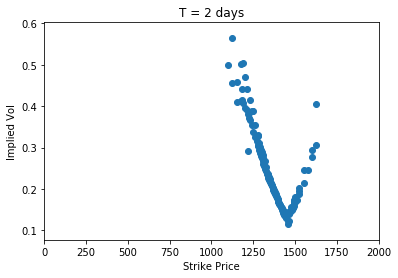

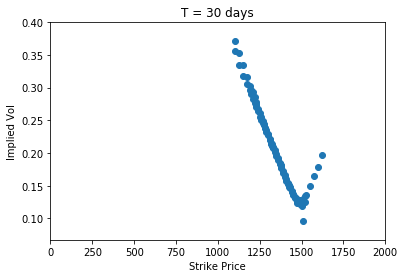

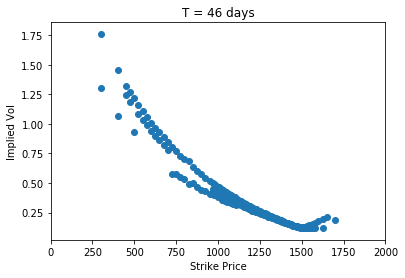

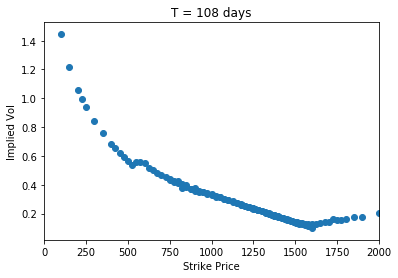

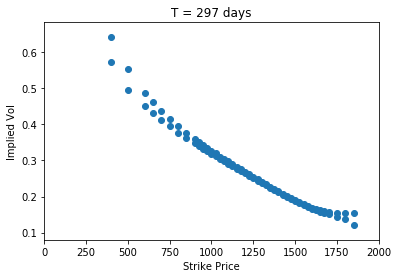

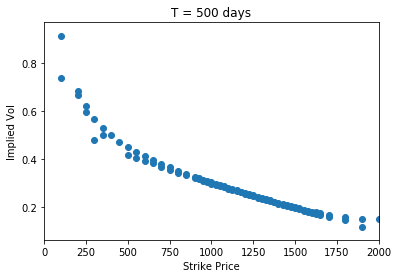

<Figure size 432x288 with 0 Axes>

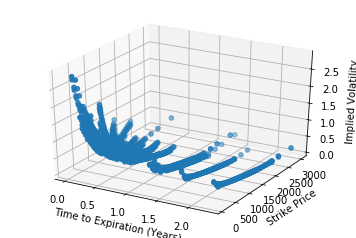

In [10]:
d = data[data['days'] == 10] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 2 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0, 2000])
plt.show() 
plt.clf() 
d = data[data['days'] == 30] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 30 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0, 2000])
plt.show() 
plt.clf() 
d = data[data['days'] == 46] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 46 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0, 2000])
plt.show() 
plt.clf() 
d = data[data['days'] == 108] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 108 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0, 2000])
plt.show() 
plt.clf() 
d = data[data['days'] == 297] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 297 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0, 2000])
plt.show() 
plt.clf() 
d = data[data['days'] == 500] 
plt.scatter(d['strike'].values, d['IV'].values) 
plt.title('T = 500 days') 
plt.xlabel('Strike Price') 
plt.ylabel('Implied Vol') 
plt.xlim([0, 2000])
plt.show() 
plt.clf() 

fig = plt.figure() 
ax = fig.gca(projection='3d')

ax.set_xlabel('Time to Expiration (Years)')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Implied Volatility')
ax.scatter(T, K, V)

In [16]:
i = 50
print(P[i])
print(option_price(1430, K[i], T[i], V[i], callput[i], 0.02))
print(K[i], T[i], V[i], callput[i])

245.6
342.11347797863675
1250 2.293150684931507 0.257936 C
